# Initialization

- import of libraries neede
- definition of global variables


## Assumptions 
- The Dependency-Track API key has been added to the `.env` file with the name `DEPENDENCY_TRACK_API_KEY`.
- The notebook needs to be **connected to Roche VPN** to access Dependency-Track and Defect Dojo`

- For **WSL2** users, `wsl-vpnkit` needs to be installed and started from PowerShell using the following command:

```bash
wsl.exe -d wsl-vpnkit --cd /app wsl-vpnkit
```

In [1]:
import warnings
import sys
sys.path.append('../src')

from dependency_track import DependencyTrack as dt   # to connect with DependencyTrack and get project_info and project_data
from visualization import *                          # to create visualizations

# Deactivate warning from SSL certificates           # to remove SSL warnings
warnings.filterwarnings('ignore') 

# Create DependencyTrack instance
# this connects with dependency-track and downloads project info (name, version, UUID) for all projects
dt_instance = dt()                                   # connect with dependency-track and download project info (name, version, 
                                                     # UUID) and persist in dt_instance.project_info and in file project_info.csv"

In [3]:
dt_instance.project_info

,Name,Version,UUID
0,DD Integration,1,26b6f86a-a4b9-49b4-94fb-688cba7fb117
1,Floodlight_gitlab_cont,1,7ecb1271-7b7a-428b-aa85-9d7695d74654
2,Floodlight_jfrog_advanced_security_cont,1,7f05c871-c4b1-4171-bb6e-361d17246ca4
3,Floodlight_jfrog_cont,1,1fc23e96-bef8-4d07-b45f-9348f5a22e9a
4,Floodlight_syft_cont,1,a969a2e1-7fa5-44e6-802e-af571745a275
...,...,...,...
77,WebGoat_jfrog_advanced_security_cont,1,46fe530b-ddee-45ec-9514-a0545893da07
78,WebGoat_jfrog_cont,1,14241678-9721-48a9-85c4-54a283706421
79,WebGoat_syft_cont,1,385f0aa0-2f8c-4a6b-847a-fe098826398f
80,WebGoat_trivy_cont,1,5b8c9f7a-d3d8-4fcf-9089-19f3569162c5


# Load SBOM Data

**Projeec in scope**:

- Floodlight
- Generator_2
- iEdgeMicroService
- Juice_Shop
- NMP
- pm-dashboard-frontend
- pm-lst-kpi-module
- pm-mongo
- RDCS_RDCP-Client
- RT-Cosmo
- vul_flask_app
- WebGoat

In [4]:
# List of projects in scope
in_scope = ['Floodlight',
            'Generator_2',
            'iEdgeMicroService',
            'Juice_Shop',
            'NMP',
            'pm-dashboard-frontend',
            'pm-lst-kpi-module',
            'pm-mongo',
            'RDCS_RDCP-Client',
            'RT-Cosmo',
            'vul_flask_app',
            'WebGoat'
           ]

## Analyze SBOM Data for using different data fields

- Load data
- Analyze names
- Analyze versions
- Analyze other data fields

The following data fields are evaluated: <br>
-  `name` 
-  `p_name` 
-  `name` + `version`
-  `p_name` + `p_version`
-  hybrid `name`|`p_name` + `version`|`p_version`

### SBOM comparison based on 'name' field

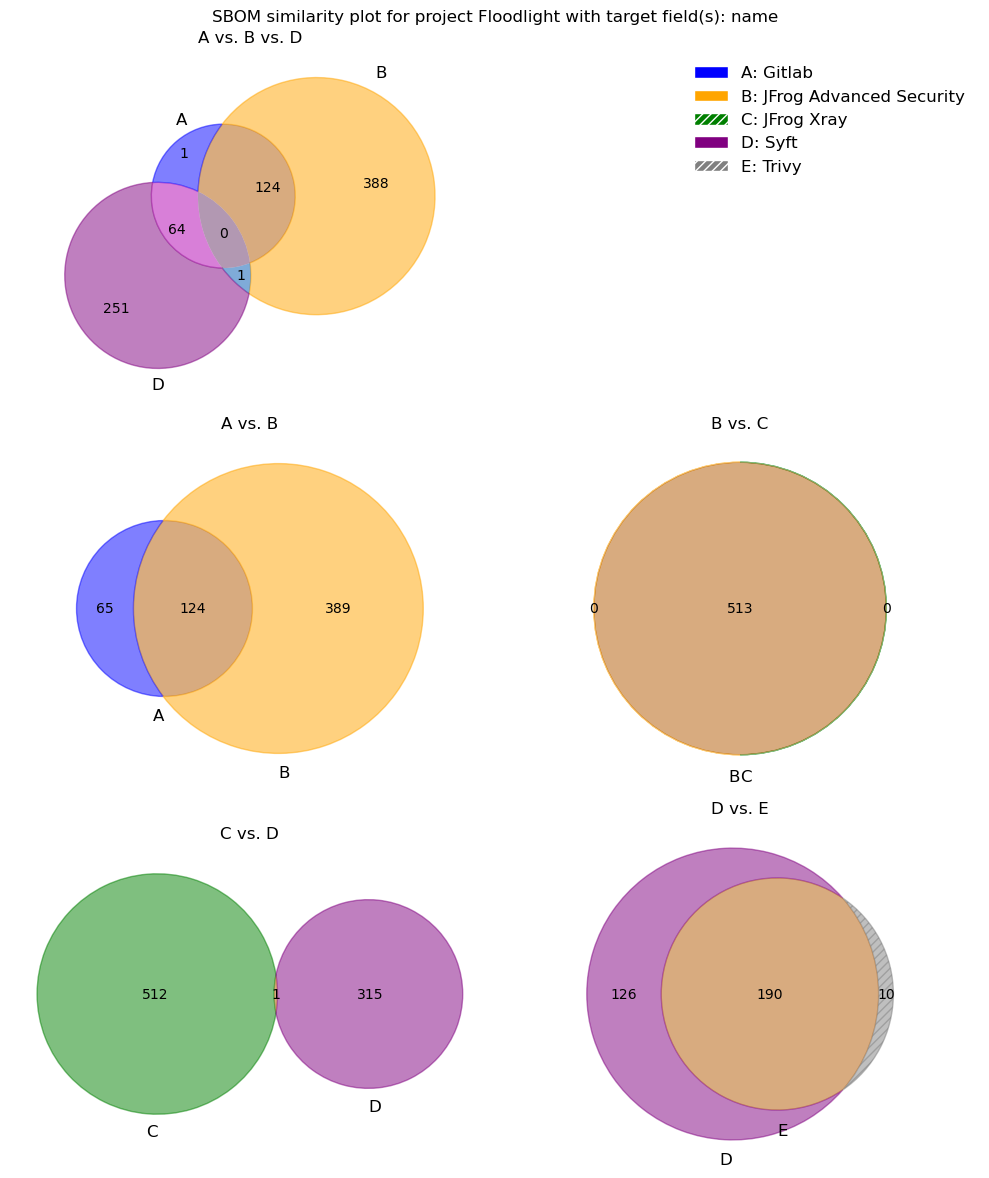

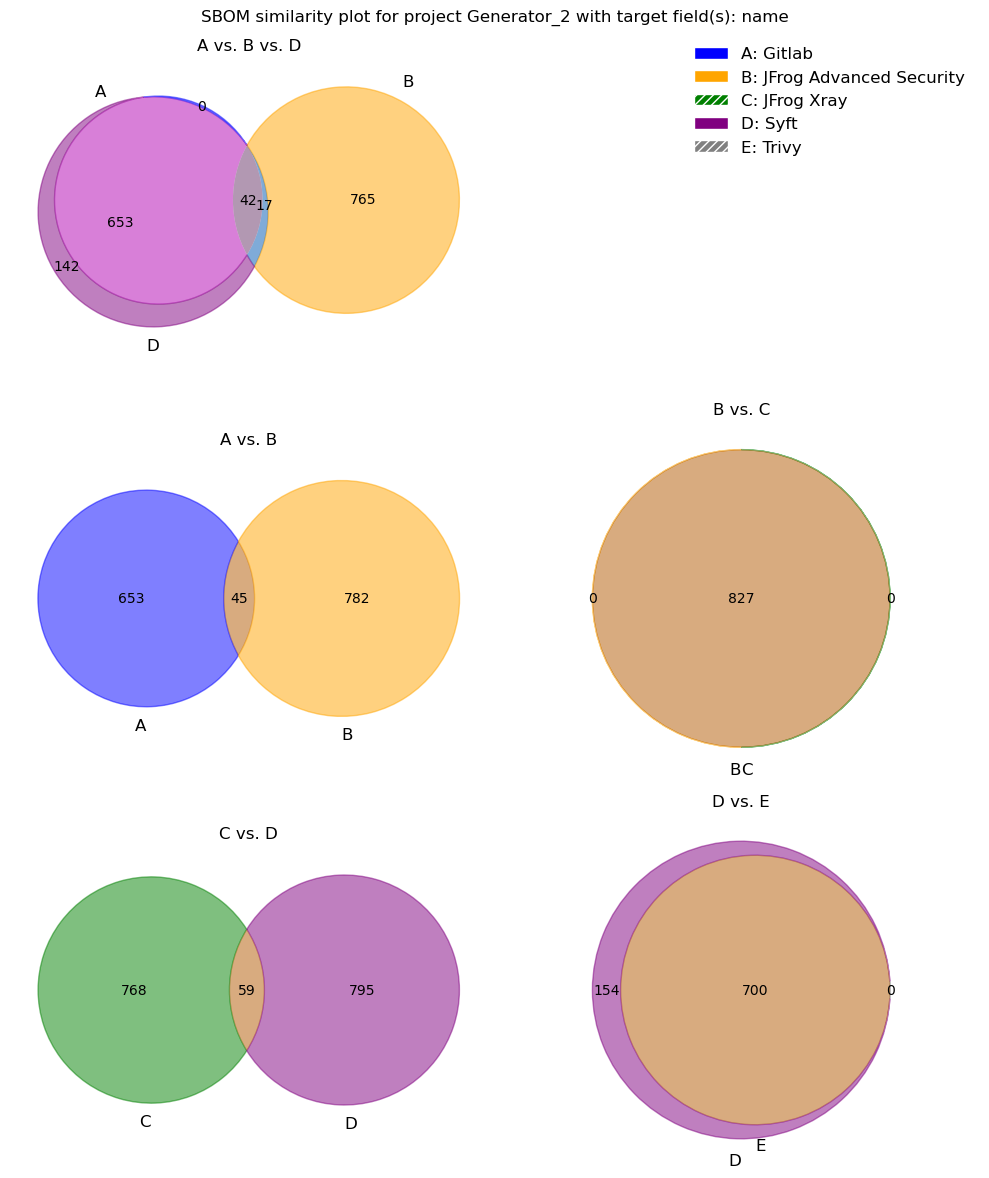

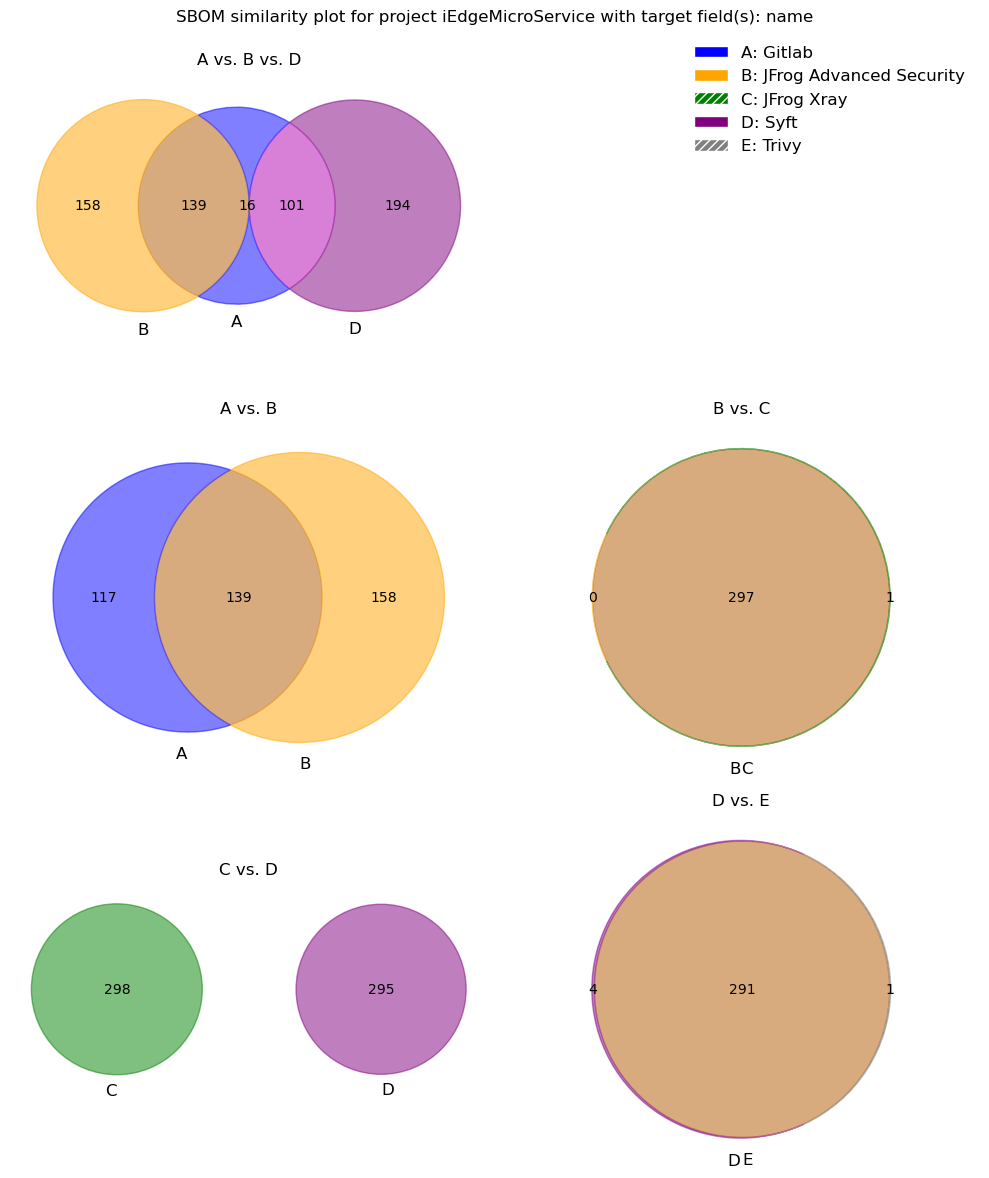

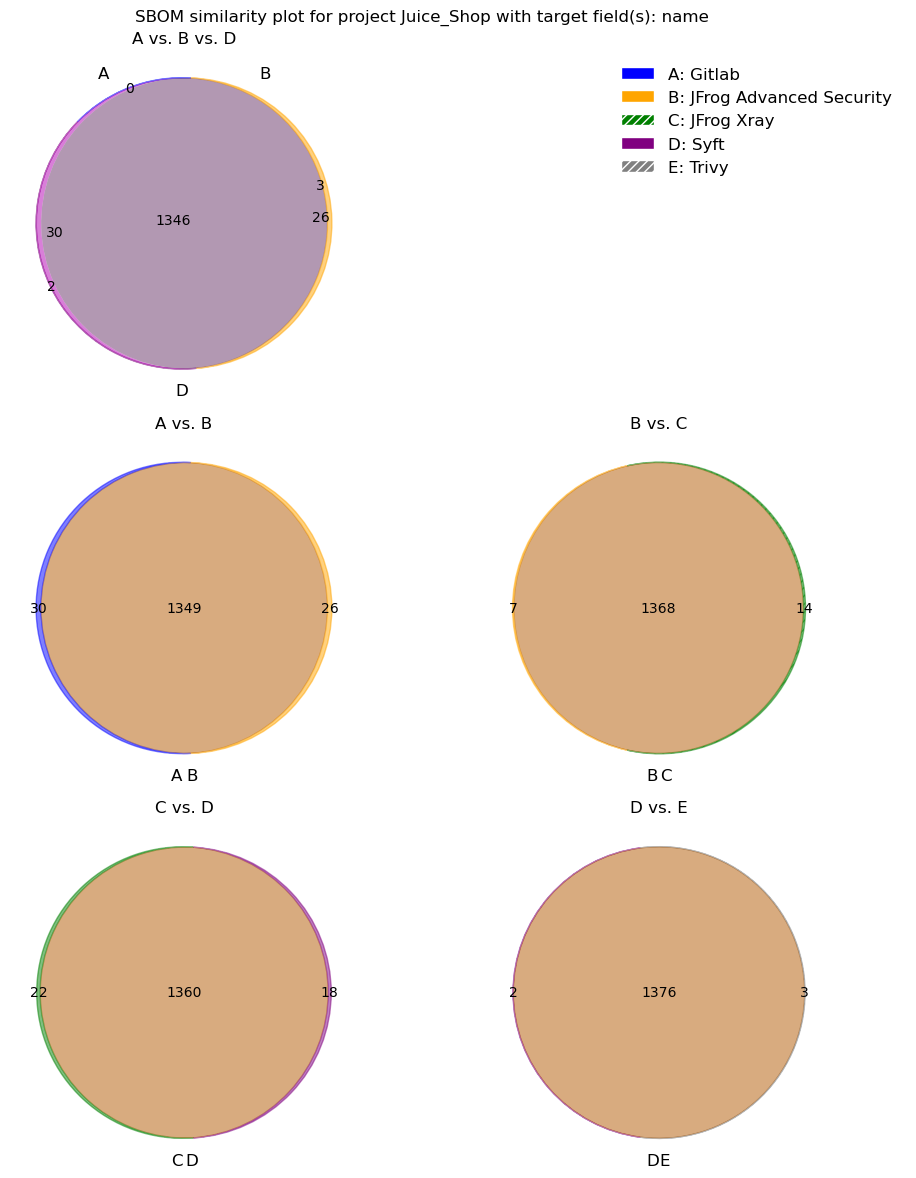

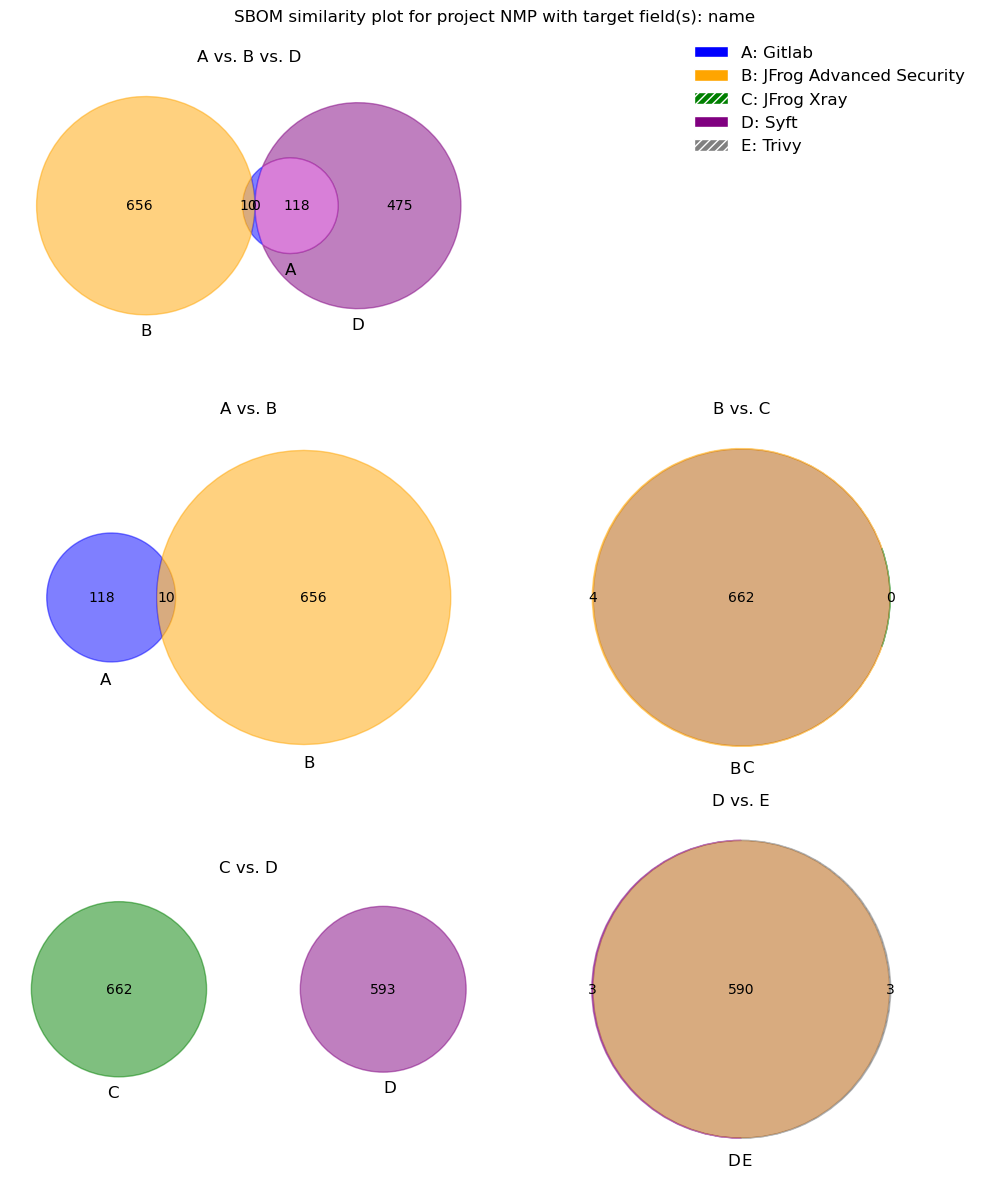

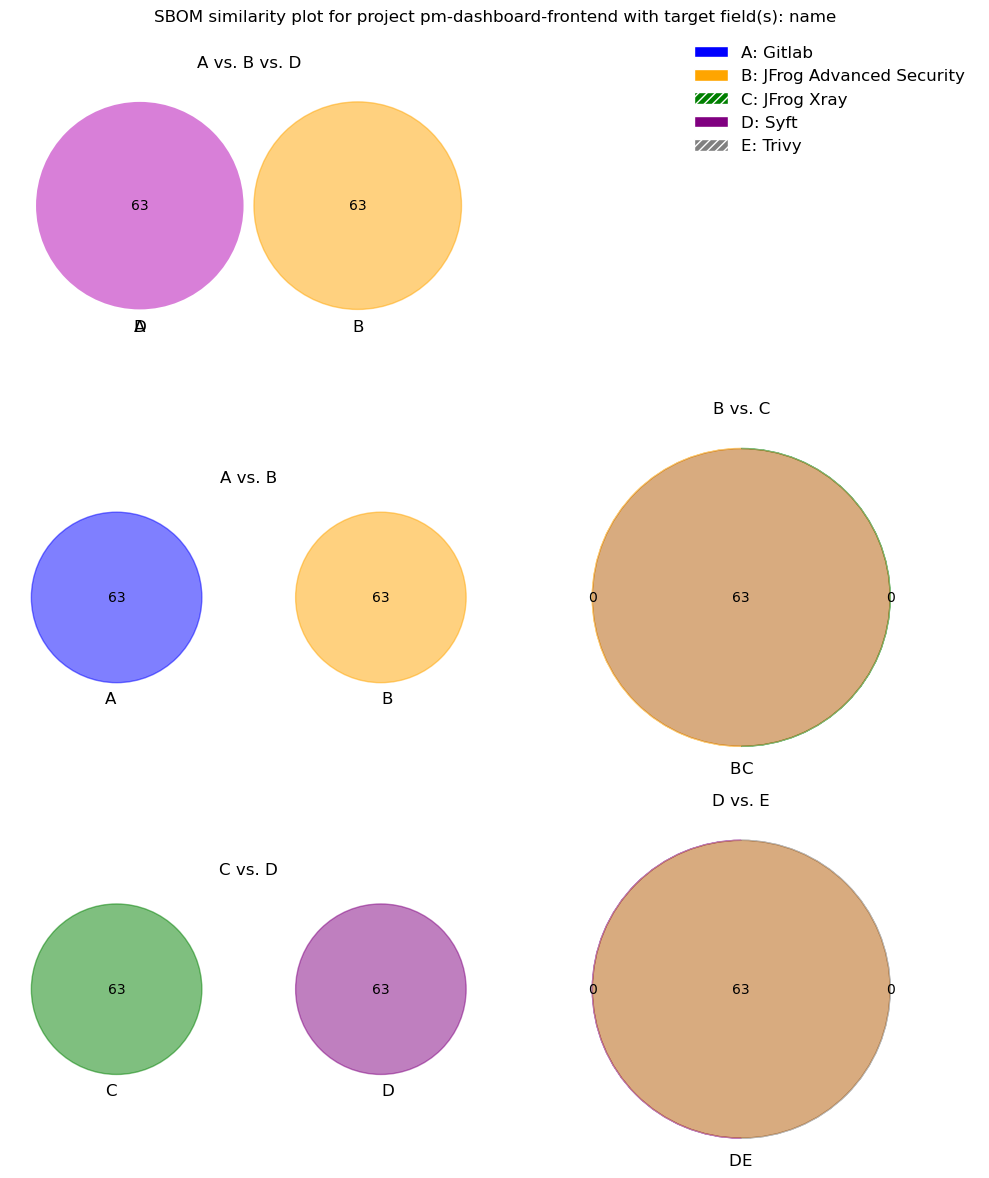

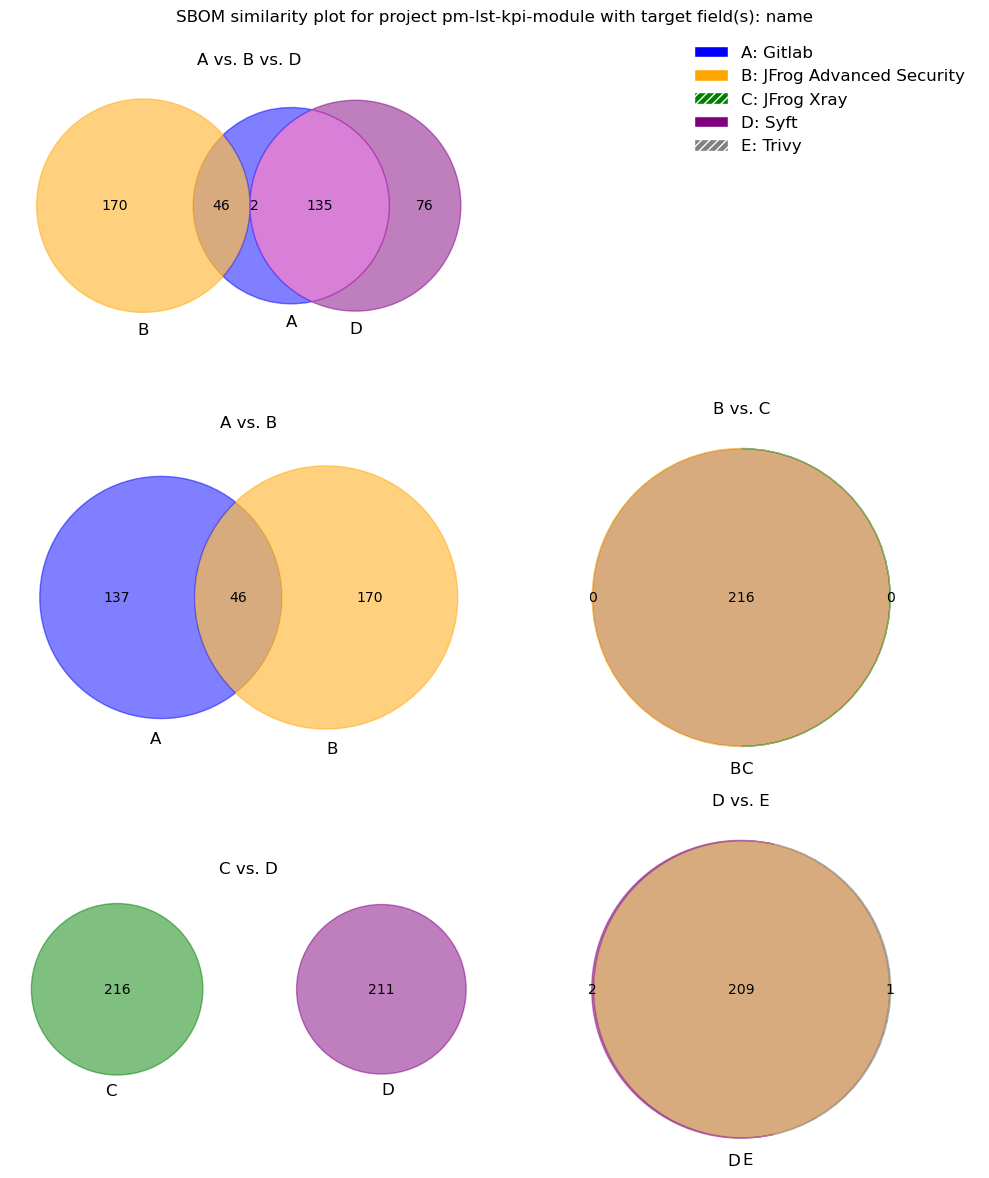

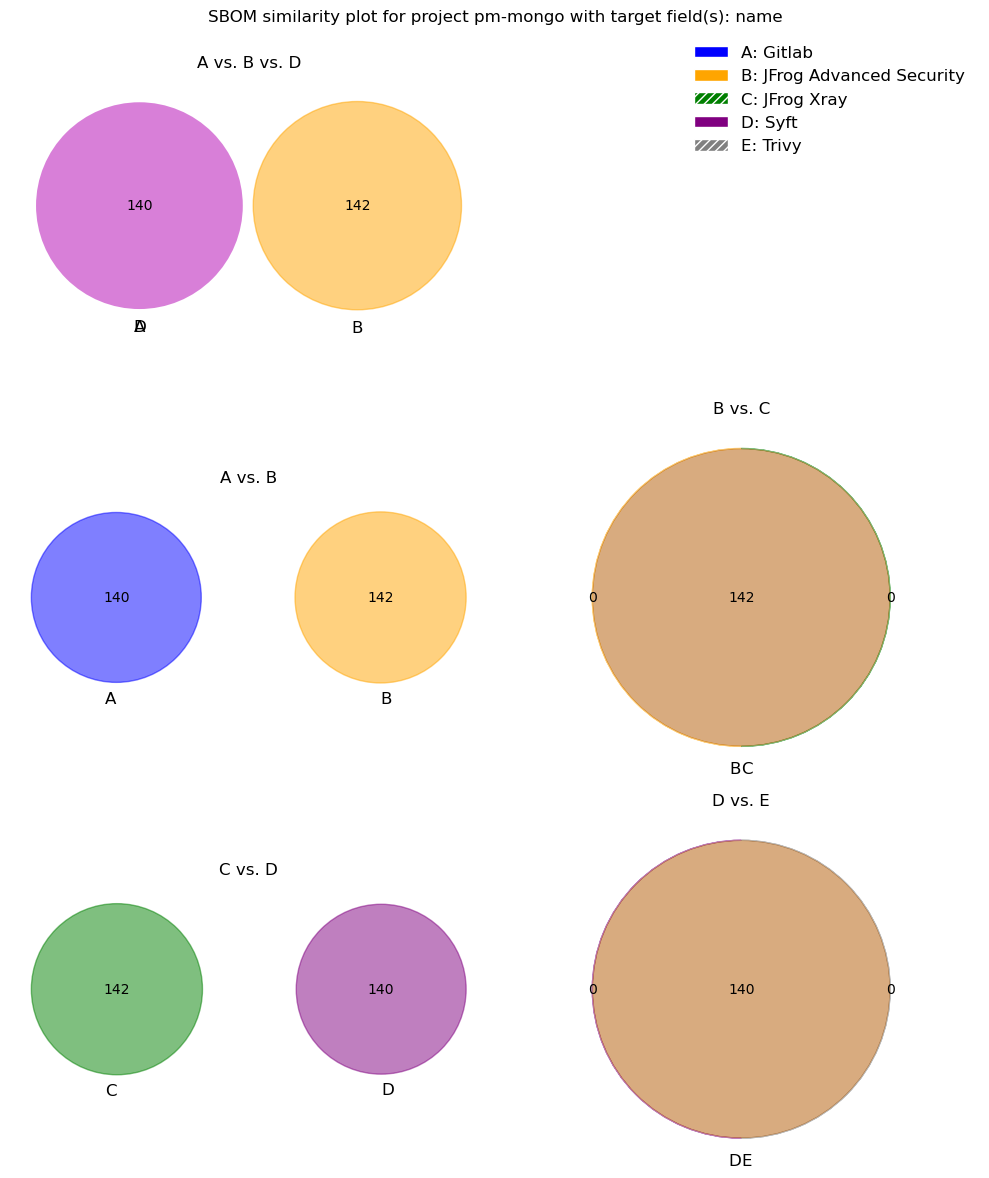

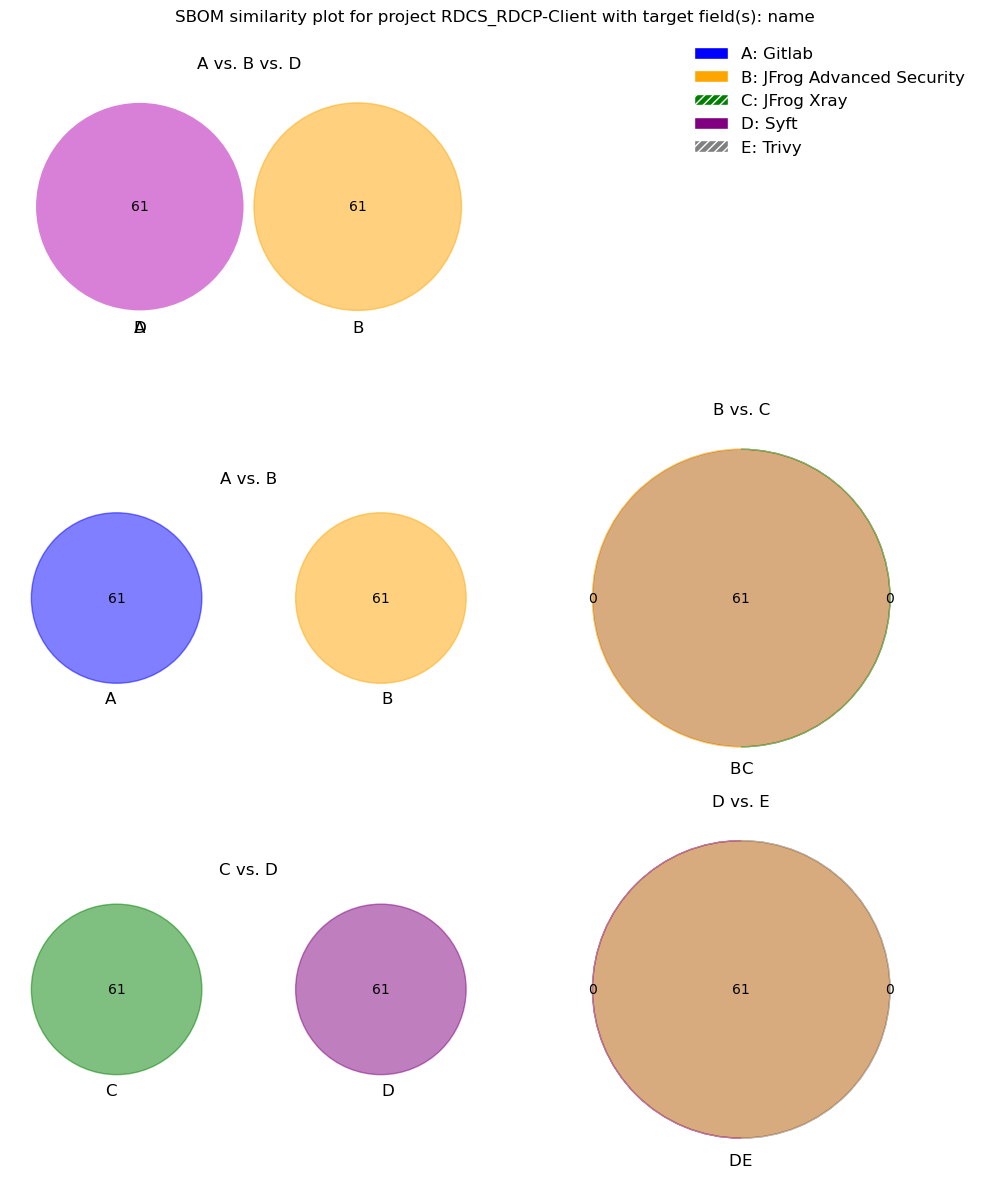

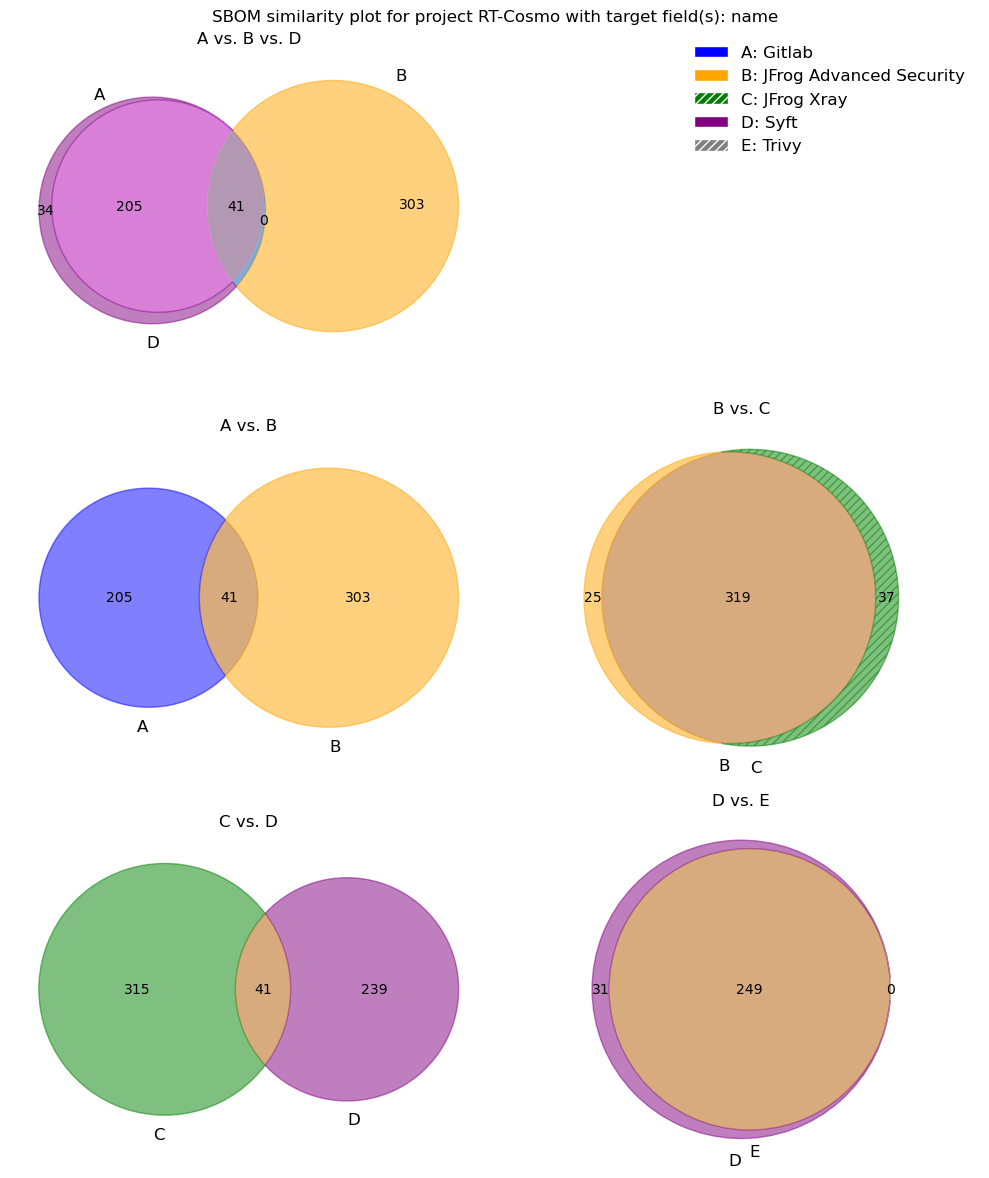

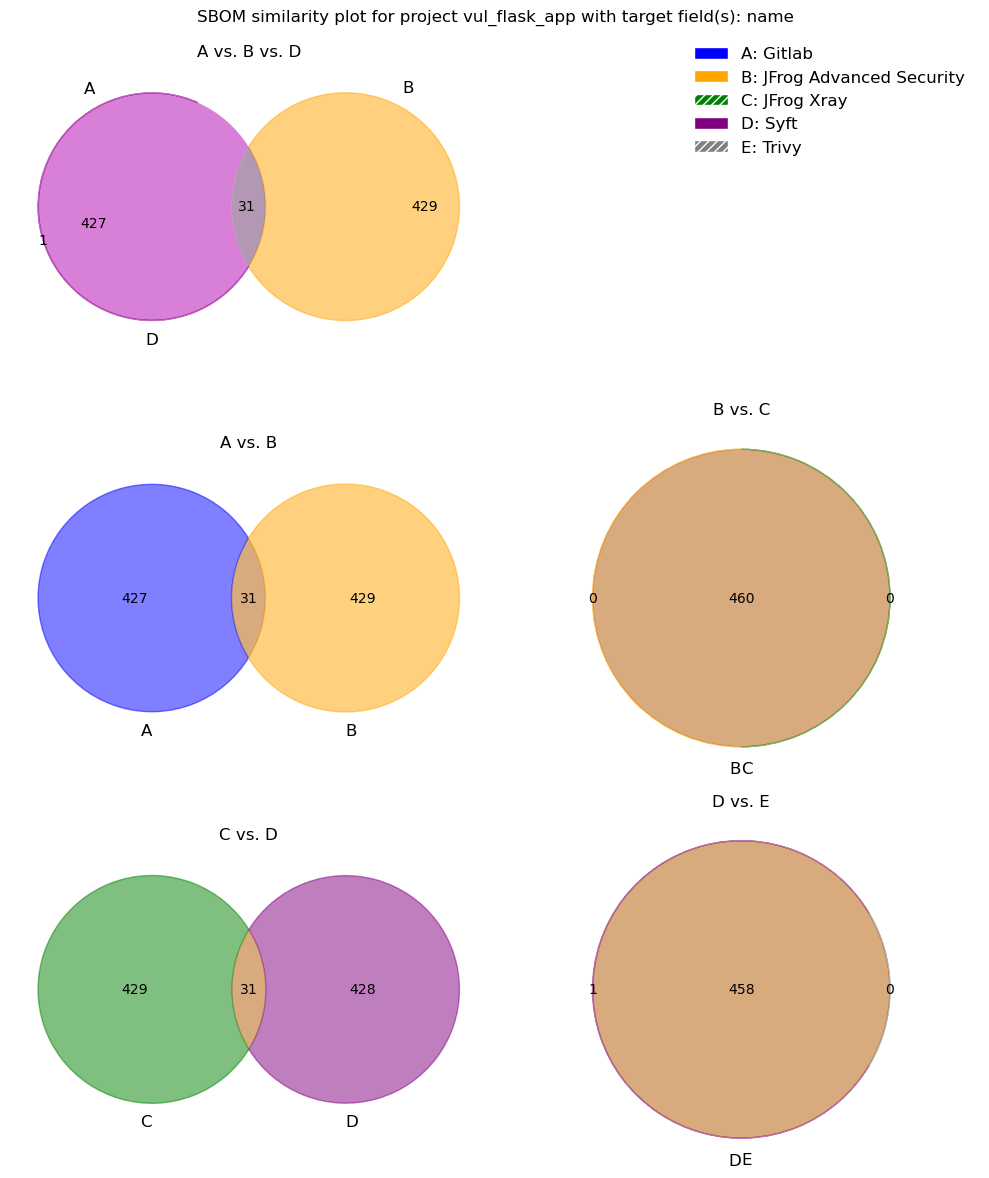

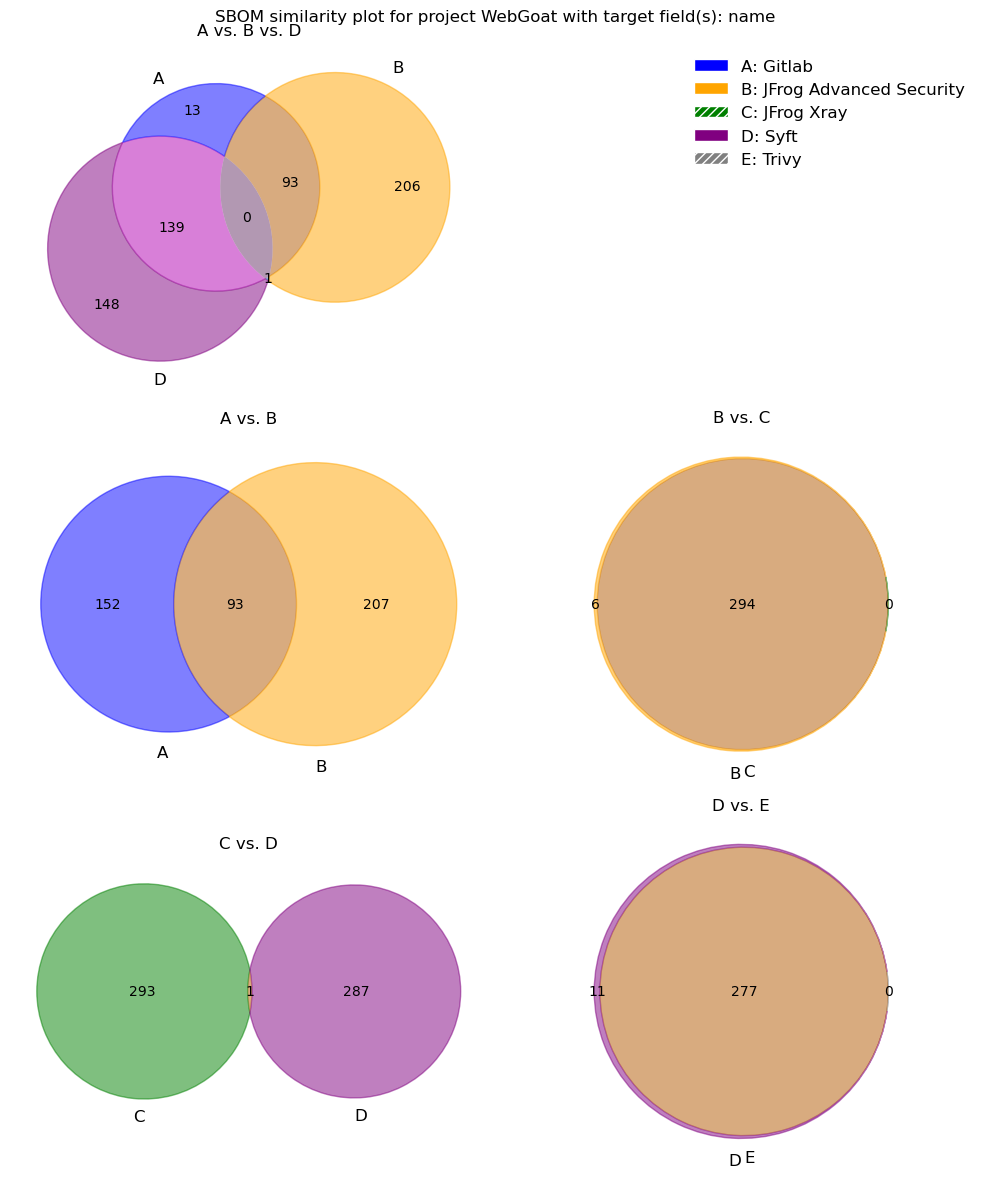

In [9]:
# define project name and target field 
project_name = in_scope[0]
target_fields = 'name'

for project_name in in_scope:
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name)

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_fields}"
    create_SBOM_similarity_plot(project_name, target_fields, project_scanner_data, target_output_file)

#### Debug SBOM comparison analysis

### SBOM comparison based on 'p_name' field

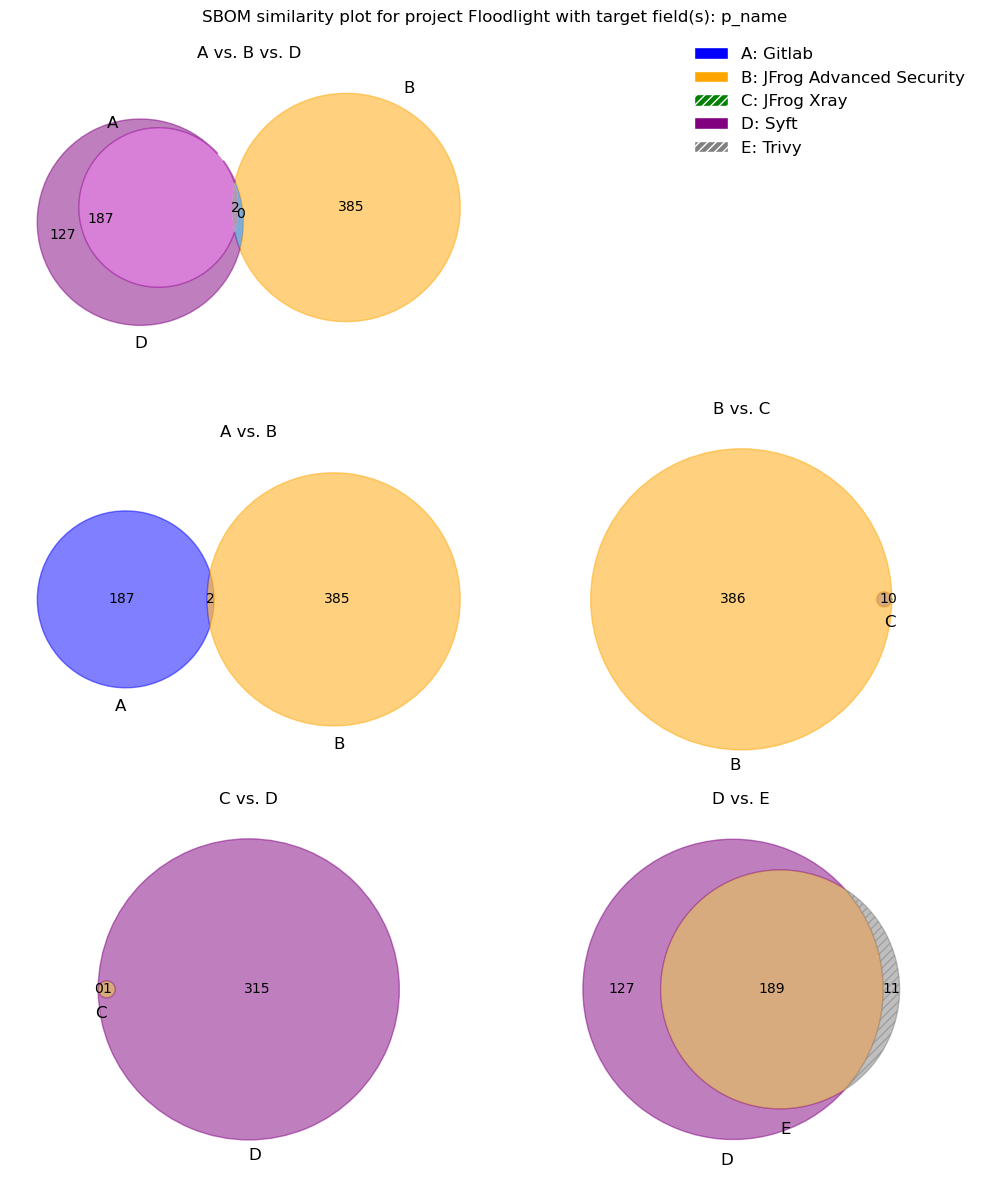

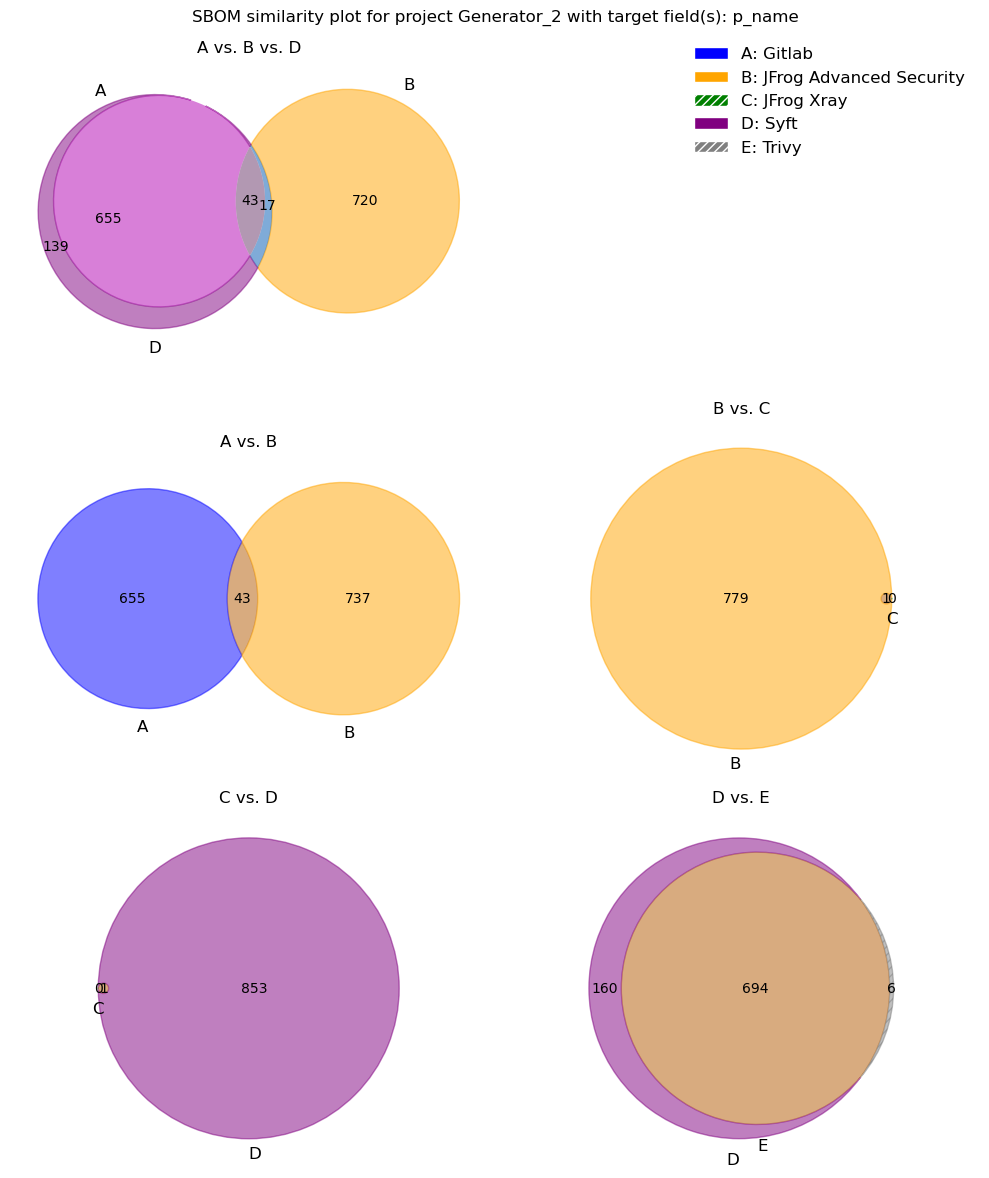

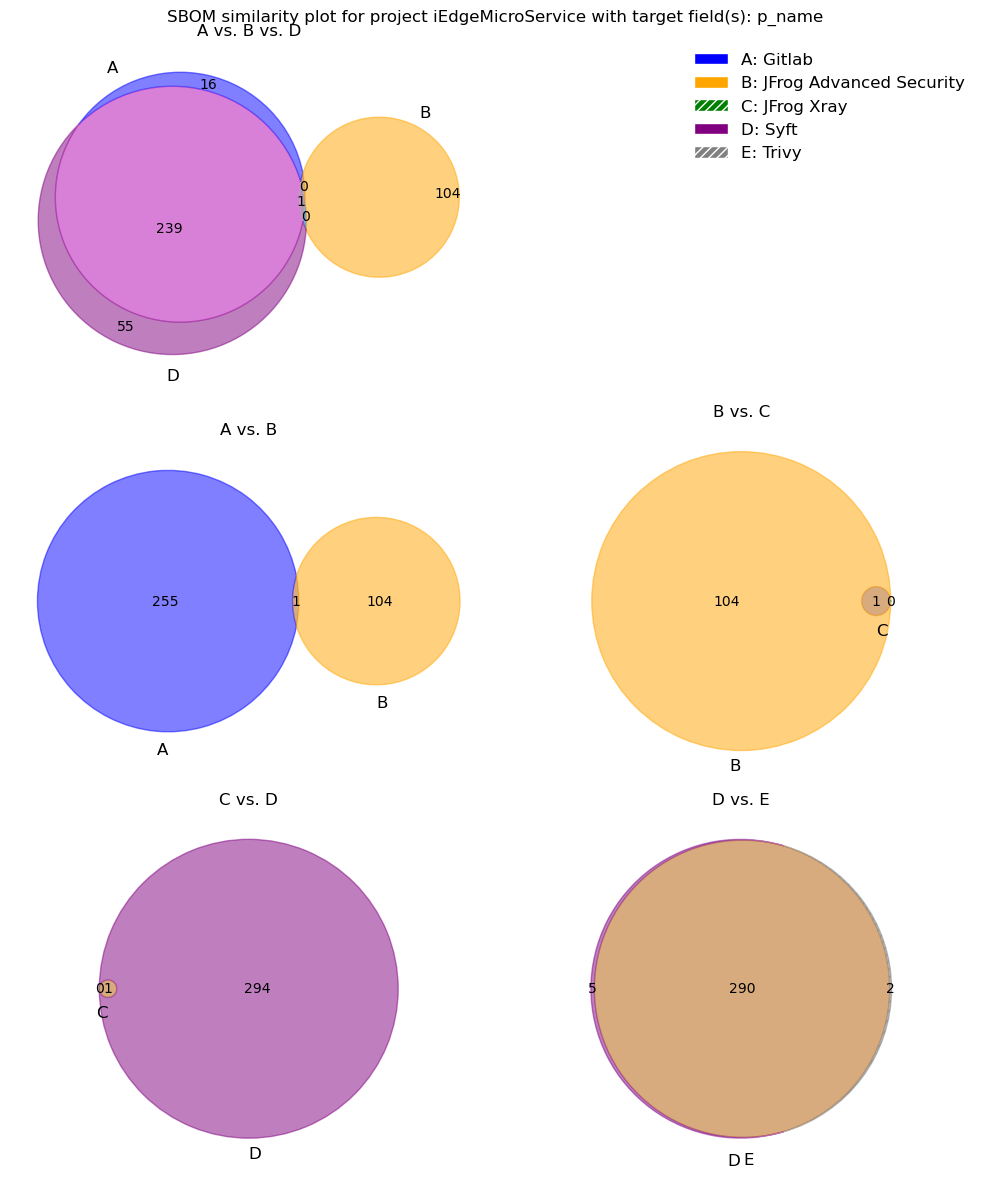

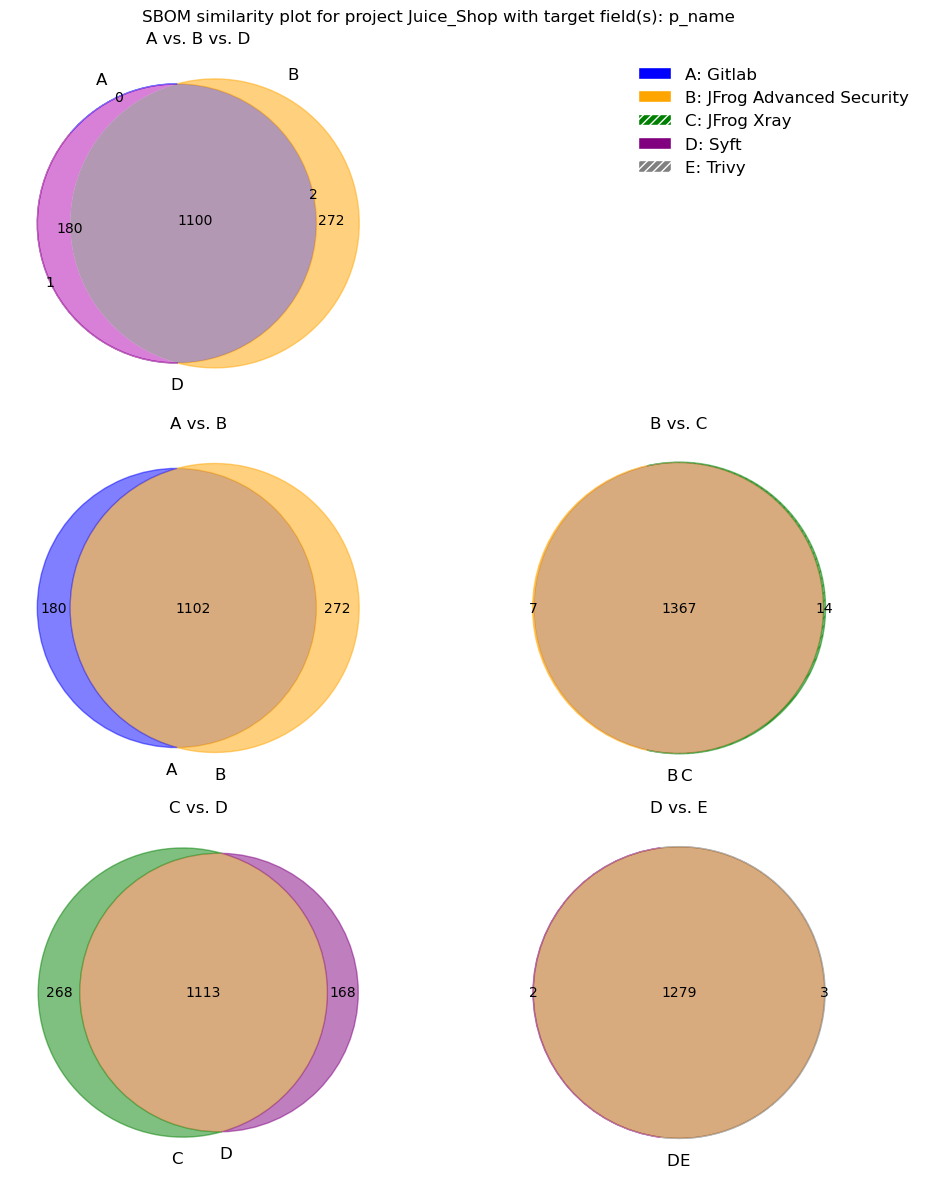

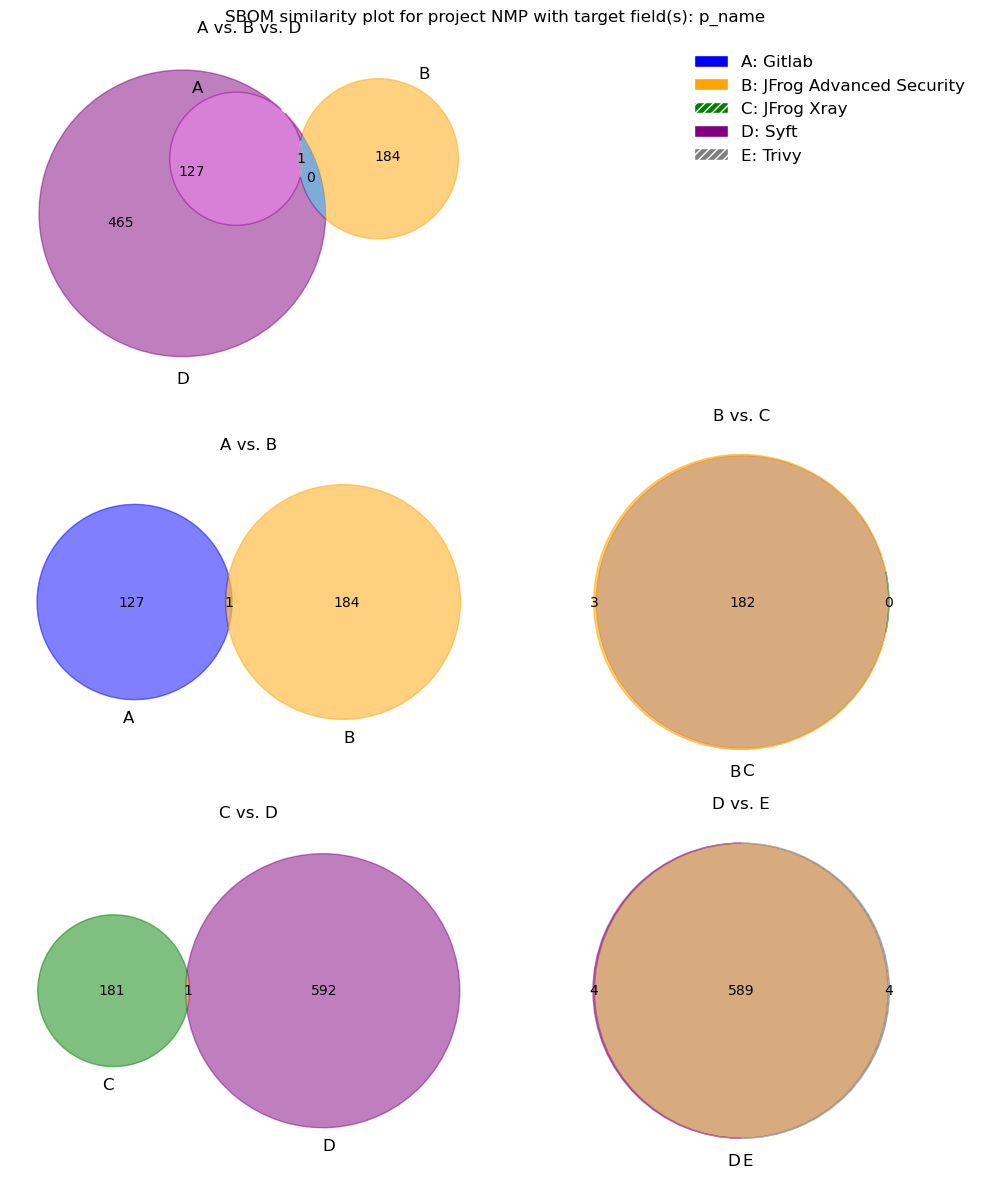

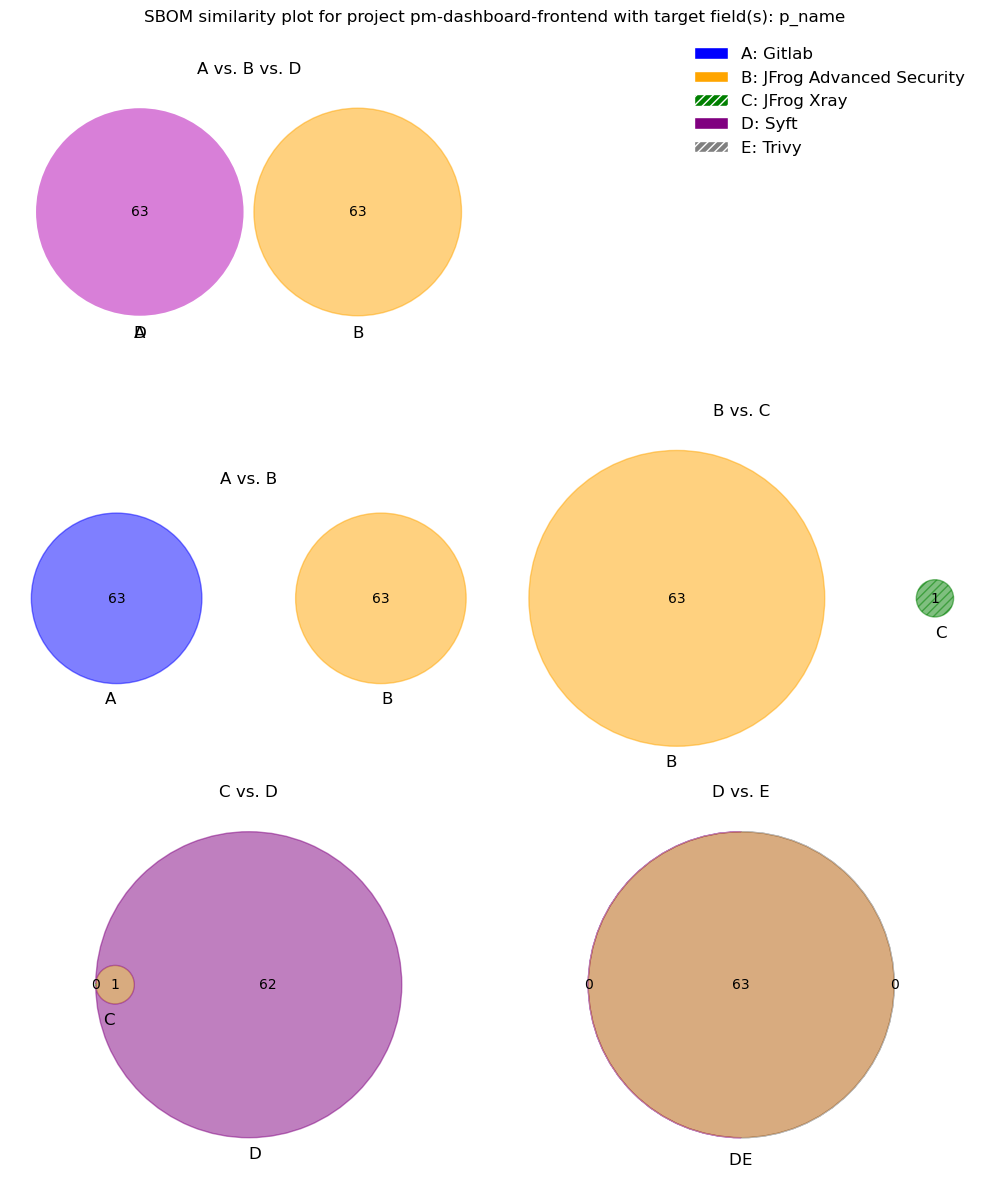

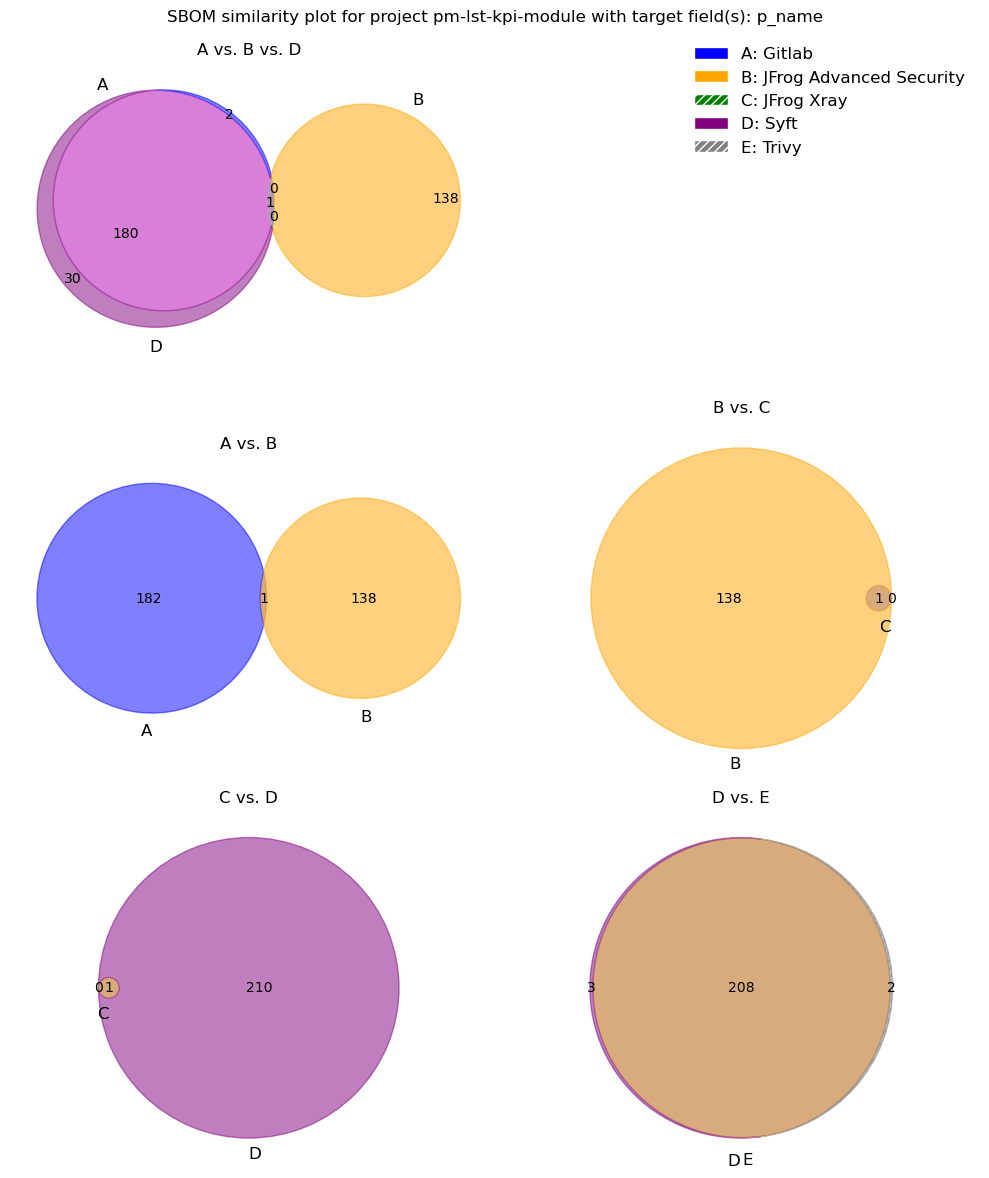

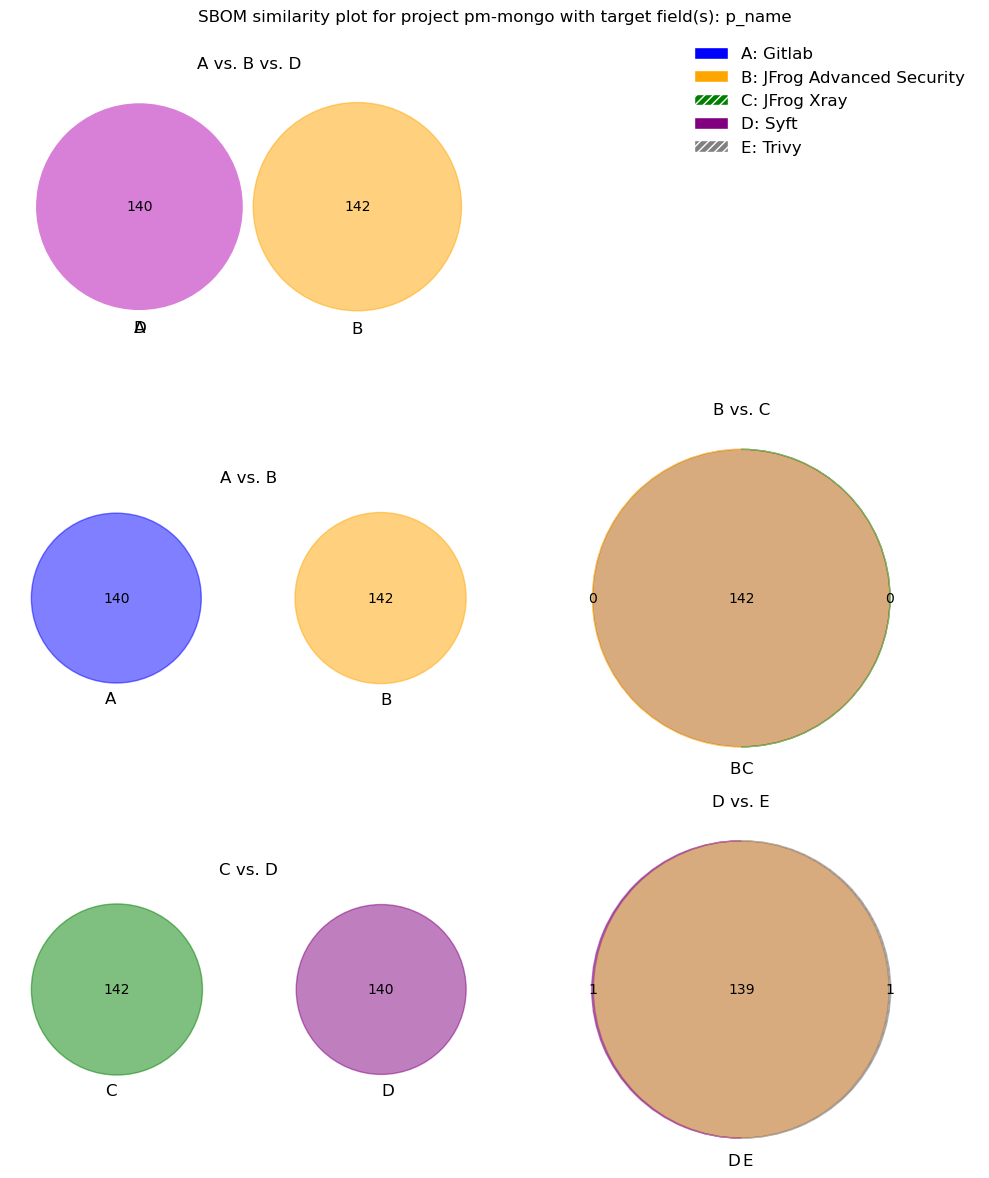

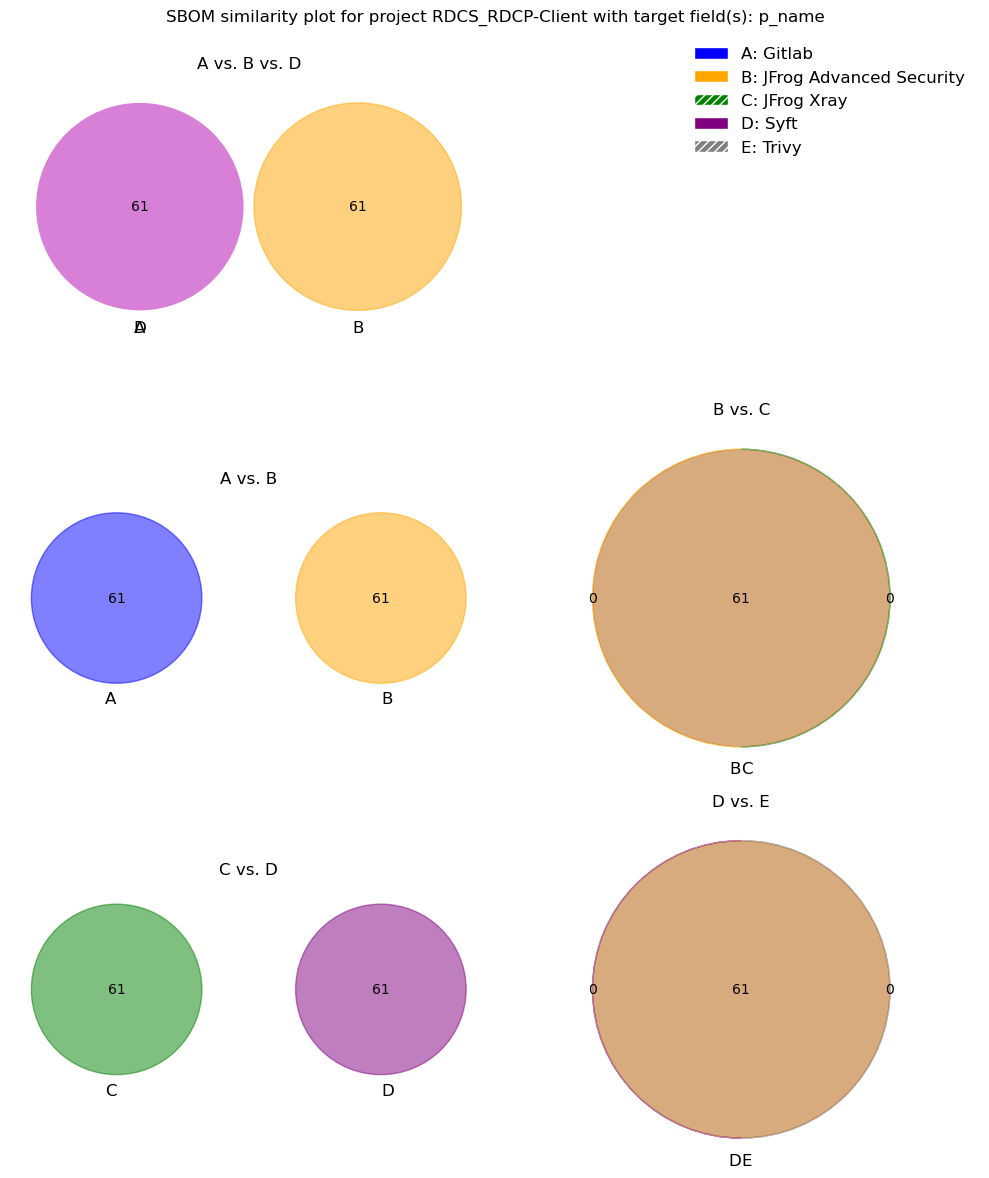

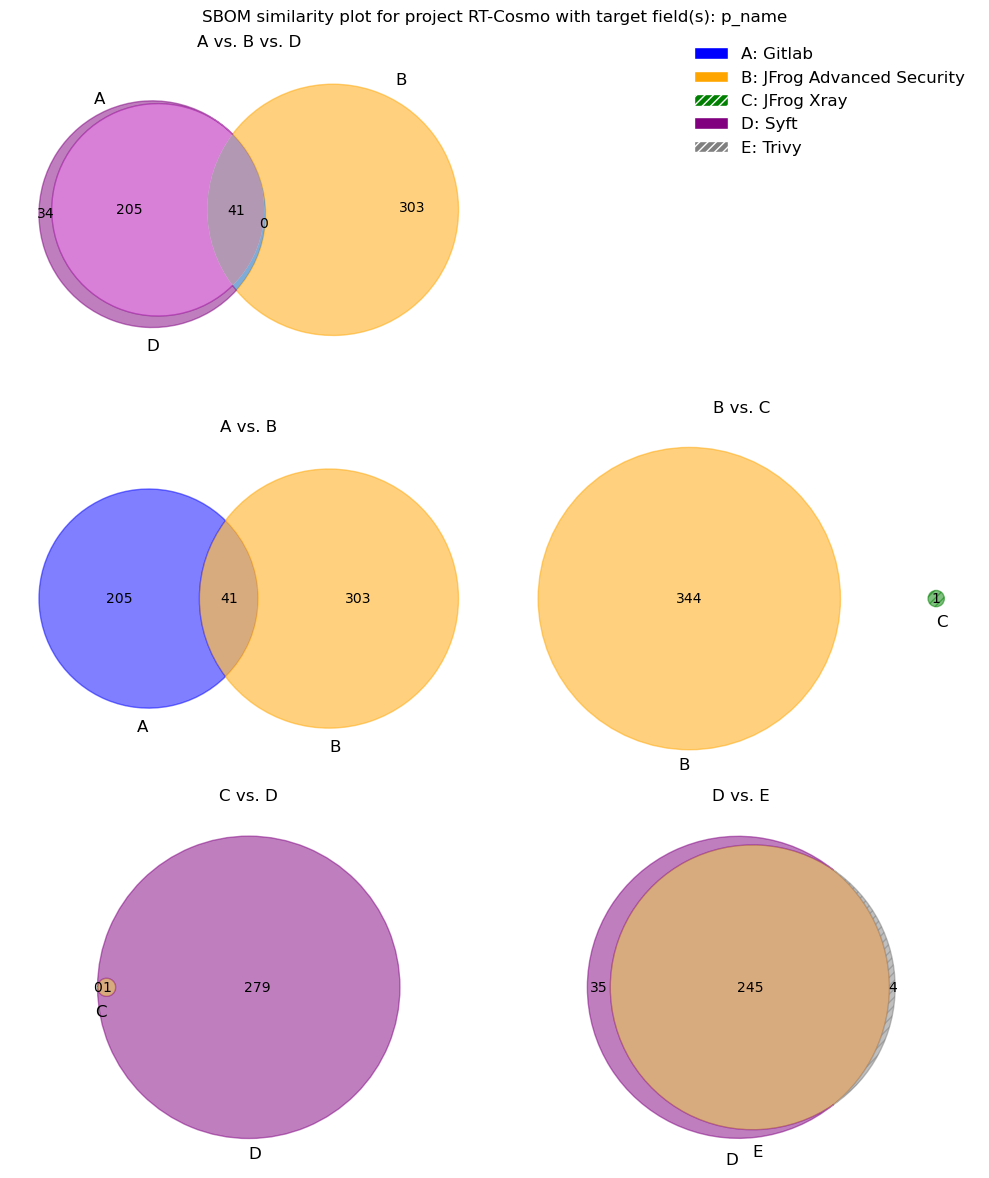

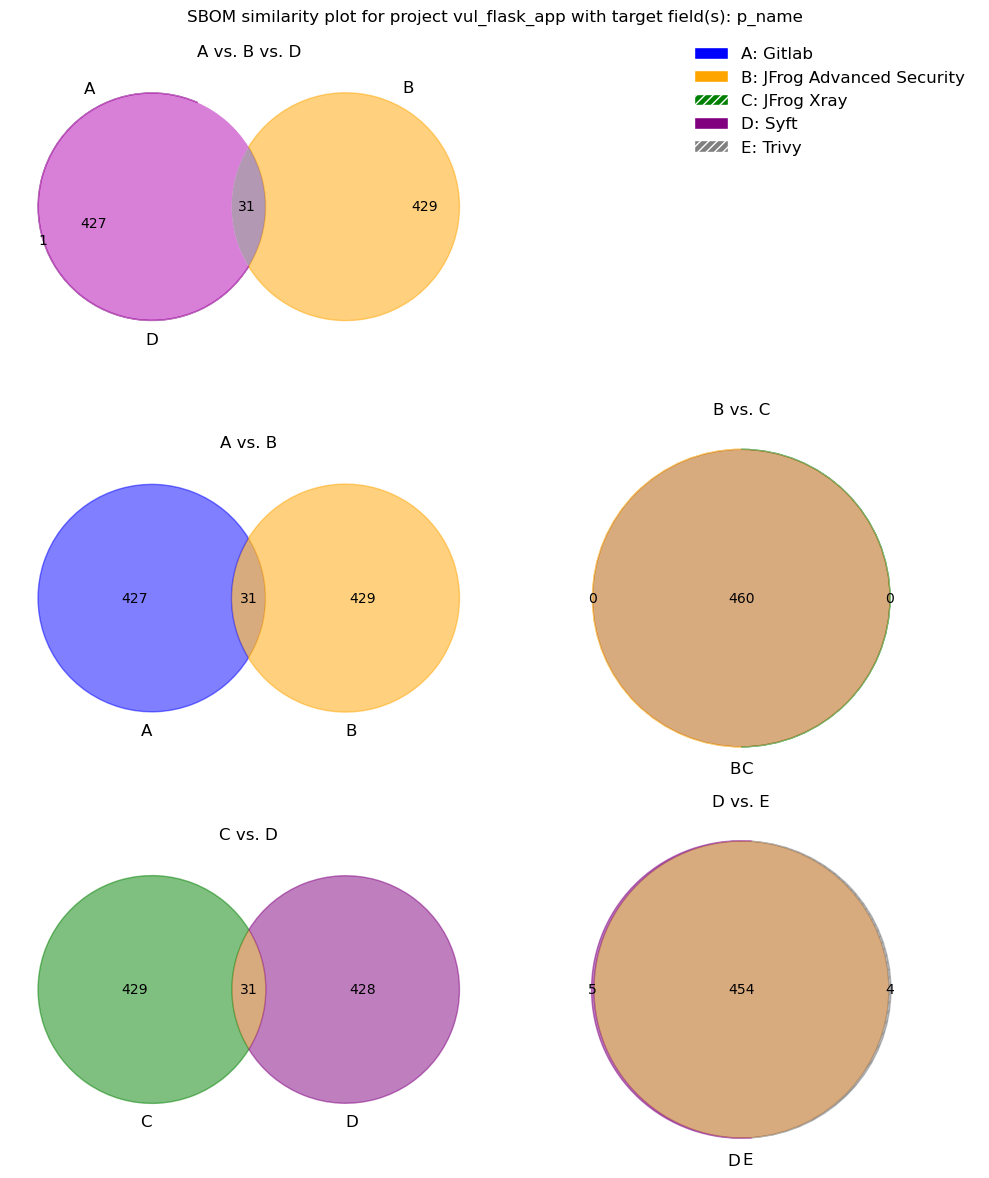

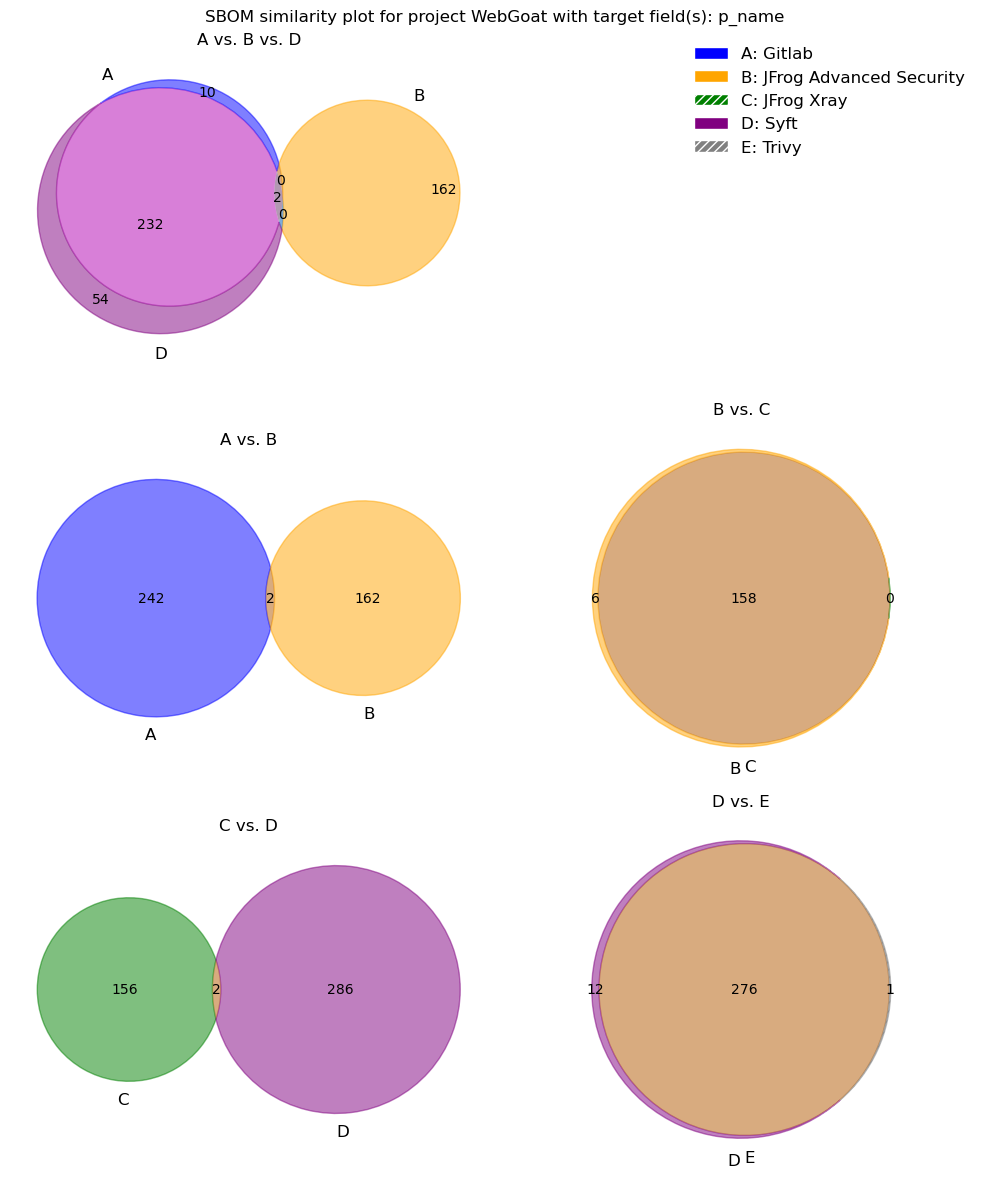

In [8]:
# define project name and target field 
project_name = in_scope[0]
target_fields = 'p_name'

for project_name in in_scope:
    # get project data in data frame
    project_scanner_data = dt_instance.collect_all_scanner_data(project_name)

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_fields}"
    create_SBOM_similarity_plot(project_name, target_fields, project_scanner_data, target_output_file)

# Workarea

## Analyse purl

In [34]:
from packageurl import PackageURL